# Task 2 : To Explore Supervised Machine Learning

__1) Importing the necessary libraries__


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

__2) Importing the data__

In [ ]:
df=pd.read_csv("http://bit.ly/w-data")
print("Data Imported Successfully")
df.head()


__3) Info about the data__

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


__4) Describing the data__

In [93]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


__5) Visualizing the data__

Here we will use scatterplot
to find if we can find any relationship between Hours and Scores manually.

Text(0, 0.5, 'Percentage Score')

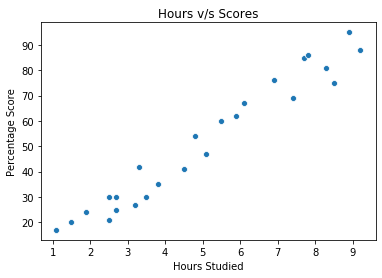

In [10]:
sns.scatterplot(data=df,x="Hours",y="Scores")
plt.title("Hours v/s Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")

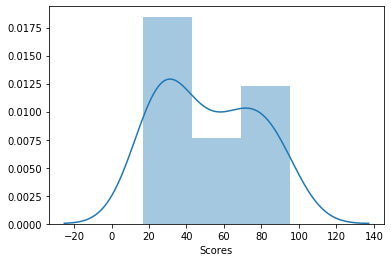

In [127]:
sns.distplot(df["Scores"])

__Here, we can find that there a positive linear relation between number of hours studied and Percentage scored.__

In [128]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


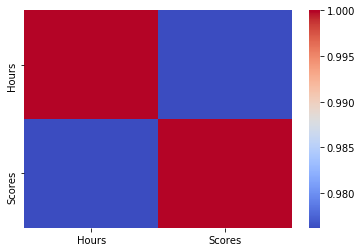

In [129]:
sns.heatmap(df.corr(),cmap="coolwarm")

Here we can see that the correlation is very high with respect to Scores and Hours. Well this was also explained earlier in the scatterplot as well.

__6) Preparing the data__

In [98]:
X=df[["Hours"]]  
y=df["Scores"]

Here will be using scikit learn in order to split the dataset into Training dataset and Test Dataset.

In [ ]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

__7) Training the algorithm__

Here we will be training the model using scikit learn in order to train the model.

In [101]:
from sklearn.linear_model import LinearRegression

In [111]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
m=regressor.coef_
c=regressor.intercept_

print("Regression coefficient= {}".format(m[0]))
print("Regression intercept= {}".format(c))

Regression coefficient= 9.65029083262787
Regression intercept= 3.4050301755918966


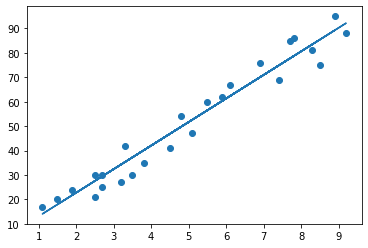

In [103]:
#creating the regression line
line=(m*X)+c

#plotting the regression line
plt.scatter(X,y)
plt.plot(X,line)


__8) Making predictions__


In [ ]:
predictions=regressor.predict(X_test)

In [105]:
#creating a data frame for actual values v/s predicted values
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df1.head()

,Actual,Predicted
8,81,83.502444
16,30,27.530757
0,21,27.530757
23,76,69.992037
11,62,60.341746


In [107]:
#predicting the predicted score for 9.25 hours studied
hours = np.array(9.25).reshape(1,-1)
pred = regressor.predict(hours)
print("No of Hours studied = {}".format(hours[0][0]))
print("Predicted Score = {}".format(pred[0]))

No of Hours studied = 9.25
Predicted Score = 92.67022037739969


__9) Evaluating the model__

In [130]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [131]:
print("Mean Squared Error=", mean_squared_error(y_test,predictions))
print("Mean Absolute Error=",mean_absolute_error(y_test,predictions))
print("R2 Score=",r2_score(y_test,predictions))

Mean Squared Error= 24.074686364260973
Mean Absolute Error= 4.564015037730867
R2 Score= 0.9435488190277577
